### Background

Figure 8a illustrates the different qualities of the model in the dimensional phase space.
Figure 8b gives a graphical approach to understand how to derive the two parameter bifurcation diagram.

In [1]:
import numpy as np
import sympy as sp
from scipy.optimize import fsolve

import matplotlib.pyplot as plt

#### Figure 8a: Phase Space

In [2]:
def normalised_model(x, a, b, c, N): # equation 3 in paper
    return -a*x + b*(N-x) + c*x**2*(N-x) - c*x*(N-x)**2

In [3]:
# Parametres
alpha_vals = [0, 0.3, 0.3] # Qualities: [no flipping, symmetric, asymmetric]
beta_vals = [0, 0.3, 0.6]
gamma_vals = [2, 1, 4.5]
M = 1.0  # Normalization to 1, i.e. x represent proportion of individuals with opinion x

x_vals = np.linspace(0, M, 100)

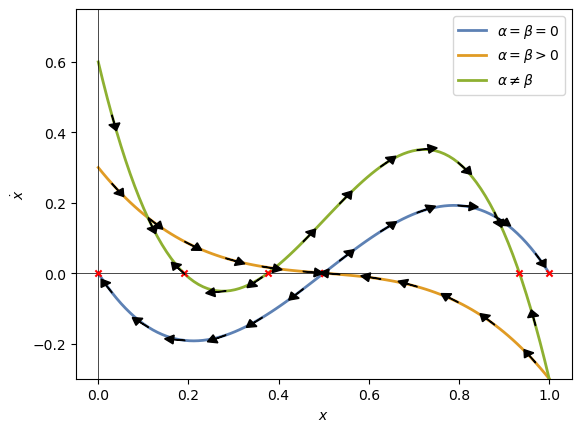

In [4]:
# Create a figure and axis for the plot
# Loop through different parameter values and plot the phase portraits
colors = ['#5d81b4', '#e09b24', '#8eb031']
labels = [r"$\alpha=\beta=0$", r"$\alpha=\beta>0$", r"$\alpha \neq \beta$"]
for idx, (a, b, c) in enumerate(zip(alpha_vals, beta_vals, gamma_vals)):
    y_vals = normalised_model(x_vals, a, b, c, M)
    # Plot the dynamics curve
    plt.plot(x_vals, y_vals, label=labels[idx], color=colors[idx], linewidth=2)#, linestyle="-")
    # Find steady states and mark them
    steady_states = fsolve(normalised_model, x0=[0.1, 0.5, 0.9], args=(a, b, c, M))
    for ss in steady_states:
        plt.scatter(ss, 0, zorder=5, marker="x", s=20, color="red")  # Mark steady states
    # Plot arrows along the curve
    n_arrows = 12
    arrow_positions = np.linspace(3, len(x_vals)-4, n_arrows, dtype=int)
    for i in arrow_positions:
        x = x_vals[i]
        y = y_vals[i]
        # Calculate slope to determine arrow direction
        dx = 0.01
        dy = normalised_model(x + dx, a, b, c, M) - normalised_model(x, a, b, c, M)
        # Normalize the direction
        norm = np.sqrt(dx**2 + dy**2)
        dx, dy = dx / norm, dy / norm
        # Reverse arrow direction if below x-axis
        if y < 0:
            dx, dy = -dx, -dy
        # Plot the arrow on the curve
        plt.arrow(x, y, dx*0.025, dy*0.025, head_width=0.025, head_length=0.02, color='black', zorder=10)

# Customize the plot
plt.axhline(0, color='black', linewidth=0.5)  # X-axis
plt.axvline(0, color='black', linewidth=0.5)  # Y-axis
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$')
plt.xlim([-0.05,1.05])
plt.ylim([-0.3,0.75])
plt.legend(loc="upper right", )

#### Figure 8b: Conditions for two-parameter bifurcation diagram

In [5]:
# Parameters
beta = 0.6
gamma = 4
M = 1
x_values = np.linspace(0.01, M, 1000)

In [6]:
# Define equation in sympy to solve symbolically
x_, alpha_, beta_, gamma_, M_ = sp.symbols('x_, alpha_, beta_, gamma_, M_')
x_dot = -alpha_*x_ + beta_*(M_-x_) + gamma_*x_**2*(M_-x_) - gamma_*x_*(M_-x_)**2

# Solve the equation for alpha
h_1 = sp.solve(x_dot, alpha_)[0]
# Calculate the first derivative of alpha_expr with respect to x
h_2 = sp.diff(h_1, x_)
# Convert the expressions to numpy functions
h_1 = sp.lambdify((x_, beta_, gamma_, M_), h_1, 'numpy')
h_2 = sp.lambdify((x_, beta_, gamma_, M_), h_2, 'numpy')

# Calculate the values of the expressions for the range of x values
h_1 = h_1(x_values, beta, gamma, M)
h_2 = h_2(x_values, beta, gamma, M)

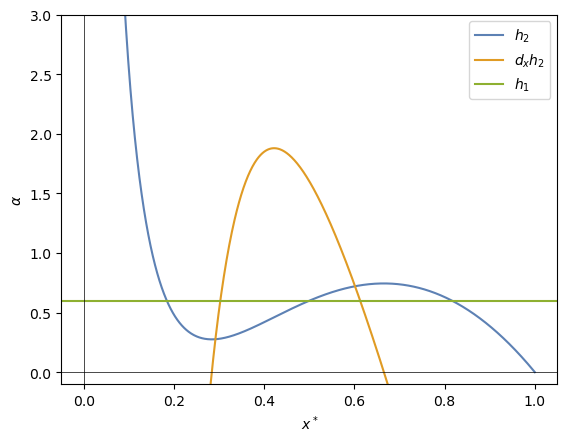

In [7]:
colors = ['#5d81b4', '#e09b24', '#8eb031']
plt.plot(x_values, h_1, label=r"$h_2$", color=colors[0], linestyle="-")
plt.plot(x_values, h_2, label=r"${d_xh_2}$", color=colors[1], linestyle="-")
plt.axhline(0.6, color=colors[2], linestyle="-", label=r"$h_1$")

plt.xlabel(r'$x^*$')
plt.ylabel(r'$\alpha$')

plt.axhline(0, linewidth=0.5, color="black")
plt.axvline(0, linewidth=0.5, color="black")

plt.ylim([-0.1, 3])
plt.xlim([-0.05, 1.05])
plt.legend()
